<a href="https://colab.research.google.com/github/lucca-fsc/FakeNewsDetection/blob/main/Detec%C3%A7%C3%A3o_de_Fake_News4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Notícias Falsas utilizando Fake Br Corpus


##Importando as bibliotecas necessárias

In [ ]:
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 7.7 MB/s 
     |████████████████████████████████| 10.1 MB 44.9 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 457 kB 45.9 MB/s 
     |████████████████████████████████| 181 kB 46.6 MB/s 
     |████████████████████████████████| 660 kB 62.5 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srs

In [ ]:
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 808 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk

In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
import spacy

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

##Carregando o dataset

In [ ]:
dados = pd.read_csv('pre-processed.csv')

In [ ]:
dados = dados.drop(columns=['index'])

## Aplicando os Métodos de Stemming e Lemmatização

In [ ]:
dados_copia = dados.copy()

In [ ]:
import re

def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

In [ ]:
dados_copia['text_tokenized'] = dados_copia['preprocessed_news'].apply(lambda x: tokenize(x))

In [ ]:
dados_copia.head()

,label,preprocessed_news,text_tokenized
0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo..."
1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent..."
2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed..."
3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir..."
4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende..."


In [ ]:
def stem_tokens(token_list):
  stemmed_list = [stemmer.stem(word) for word in token_list]
  return stemmed_list

In [ ]:
dados_copia['text_stemmed'] = dados_copia['text_tokenized'].apply(lambda x: stem_tokens(x))

KeyboardInterrupt: ignored

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
dados_copia['detoken'] = dados_copia['text_stemmed'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [ ]:
nlp = spacy.load('pt_core_news_sm')

In [ ]:
def lem_token(text):
  lemma_list = []
  doc = nlp(text)
  for word in doc:
    lemma_list.append(word.lemma_)
  return lemma_list

In [ ]:
dados_copia['lemma'] = dados_copia['preprocessed_news'].apply(lambda x: lem_token(x))

In [ ]:
dados_copia['detoken_lemma'] = dados_copia['lemma'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [ ]:
dados_copia.head()

In [ ]:
dados_copia.to_csv('dados_lemma_stem.csv', index = False)

##Importando bibliotecas para o modelo de IA


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Aplicação do Método de Vetorização. Não passando nenhum parâmetro para o dicionário e teste rápido com algoritmo de SVM.

#### Sem Nenhum pré-processamento

In [ ]:
X = dados['preprocessed_news']
y = dados['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# X = tfidf.fit_transform(X)


In [ ]:
print(len(tfidf.vocabulary_))

68562


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9611111111111111


#### Com o Algoritmo de Stemming

In [ ]:
X = dados_copia['detoken']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


In [ ]:
print(len(tfidf.vocabulary_))

31485


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9569444444444445


#### Com o Algoritmo de Lemmatizing

In [ ]:
X = dados_copia['detoken_lemma']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)



In [ ]:
print(len(tfidf.vocabulary_))

57086


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9625


**Conclusões até o momento**


1.   Sem passar nenhum valor de tamanho para o dicionário, e sem utilizar nenhum método de pré-processamento (Lemmatizing ou Stemming) o algoritmo cria um dicionário do tamanho de:  **68562 palavras**;

2.   Para este dicionário, a acurácia obtida é de: **0.961111**;

3.   Aplicando o Método de Stemming conseguimos uma grande diminuição das palavras no dicionário criado, sendo este agora composto por: **31485 palavras**;

4.   Para este Dicionário, a acurácia obtida foi de: **0.9569**;

5.   Com o método de Lemmatizing conseguimos uma pequena redução do dicionário, sendo composto por: **57086 palavras**;

6. Para este último foi obtida a acurácia de: **0.9625**.


### Aplicando o Método de Vetorização. Com um dicionário de 500 palavras e teste rápido com algoritmo de SVM.

#### Sem Nenhum Pré-Processamento

In [ ]:
X = dados['preprocessed_news']
y = dados['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features = 500)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
print(len(tfidf.vocabulary_))

500


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9375


#### Com o Algoritmo de Stemming

In [ ]:
X = dados_copia['detoken']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=500)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


In [ ]:
print(len(tfidf.vocabulary_))

500


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.937037037037037


#### Com o Algoritmo de Lemmatizing

In [ ]:
X = dados_copia['detoken_lemma']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=500)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)



In [ ]:
print(len(tfidf.vocabulary_))

500


Aplicando o algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9416666666666667


**Conclusões até o momento**


1.   Agora todos os dicionários criados possuem a mesma quantidade de palavras: **500 palavras**;

2.   Sem nenhum método de Pré-processamento, obtivemos a acurácia de: **0.9375**

3.   Utilizando o método de Stemming obtivemos a acurácia de: **0.9370**

4.   Com o método de Lematizing a acurácia obtida foi de : **0.9416**



### Aplicando o Método de Vetorização. Com um dicionário de 5000 palavras e teste rápido com algoritmo de SVM.

#### Sem Nenhum pré-processamento

In [ ]:
X = dados['preprocessed_news']
y = dados['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features = 5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
print(len(tfidf.vocabulary_))

5000


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.962037037037037


#### Com o Algoritmo de Stemming

In [ ]:
X = dados_copia['detoken']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


In [ ]:
print(len(tfidf.vocabulary_))

5000


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9611111111111111


#### Com o Algoritmo de Lemmatizing

In [ ]:
X = dados_copia['detoken_lemma']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)



In [ ]:
print(len(tfidf.vocabulary_))

5000


Aplicando o Algoritmo de SVM

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9587962962962963


**Conclusões até o momento**


1.   Agora todos os dicionários criados possuem a mesma quantidade de palavras: **5000 palavras**;

2.   Sem nenhum método de Pré-processamento, obtivemos a acurácia de: **0.9620**

3.   Utilizando o método de Stemming obtivemos a acurácia de: **0.9611**

4.   Com o método de Lematizing a acurácia obtida foi de : **0.9587**



##### **Conclusões Parciais**

 **Conclusões parciais sobre os testes realizados**


1.   Como podemos observar, quanto **mais palavras** compõem o dicionário, **melhor** será a **acurácia** do modelo. Os resultados com apenas 500 palavras no dicionário tiveram uma menor acurácia que os demais;

2.   No dicionário com apenas 500 palavras, o melhor método foi o de **Lemmatizing**, que alcançou uma acurácia de **0.9416**;

3.   Para o dicionário de 5000 palavras, os **resultados foram bem próximos**, sendo o **melhor método** o sem aplicar **nenhum algoritmo de pré-processamento**;

4.   Quando não foi passado o tamanho máximo do dicionário, os resultados também são bem próximos, sendo o método de Lemmatizing ligeiramente melhor, com uma acurácia de: **0.9625**

5.   Vale ressaltar que o algoritmo de stemmização conseguiu reduzir na metade a quantidade de palavras no dicionário e continuou com uma acurácia de: **0.9569**, sendo este um bom resultado, já que a dimensão do modelo foi diminuida pela metade.



### Exploração detalhada dos Classificadores utilizados (SVM, KNN, Decision Tree)

Foi adotado como padrão utilizar um dicionário de 5000 palavras para testar os demais classificadores presentes neste projeto.

#### Sem Nenhum pré-processamento

##### Utilizando o classificador SVM 

In [ ]:
X = dados['preprocessed_news']
y = dados['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features = 5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do SVM sem nenhum método de pré-processamento: {:.2f}%'.format(accuracy))
print('F1 Score obtida do SVM sem nenhum método de pré-processamento: {:.2f}%'.format(f1))

Acurácia obtida do SVM sem nenhum método de pré-processamento: 96.20%
F1 Score obtida do SVM sem nenhum método de pré-processamento: 96.20%


In [ ]:
print('--------------Resultados obtidos sem nenhum método de pré-processamento---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos sem nenhum método de pré-processamento---------------

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      1085
        true       0.96      0.96      0.96      1075

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



Matriz de Confusão obtida do SVM sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


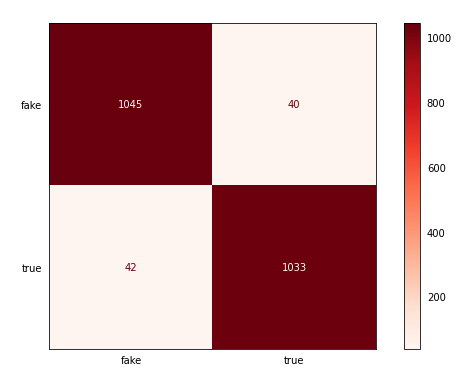

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

##### Utilizando o classificador KNN 

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do KNN sem nenhum método de pré-processamento:: {:.2f}%'.format(accuracy))
print('F1 Score obtida do KNN sem nenhum método de pré-processamento: {:.2f}%'.format(f1))

Acurácia obtida do KNN sem nenhum método de pré-processamento:: 72.31%
F1 Score obtida do KNN sem nenhum método de pré-processamento: 71.05%


In [ ]:
print('--------------Resultados obtidos sem nenhum método de pré-processamento---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos sem nenhum método de pré-processamento---------------

              precision    recall  f1-score   support

        fake       0.89      0.51      0.65      1085
        true       0.66      0.94      0.77      1075

    accuracy                           0.72      2160
   macro avg       0.77      0.72      0.71      2160
weighted avg       0.77      0.72      0.71      2160



Matriz de Confusão obtida do KNN sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


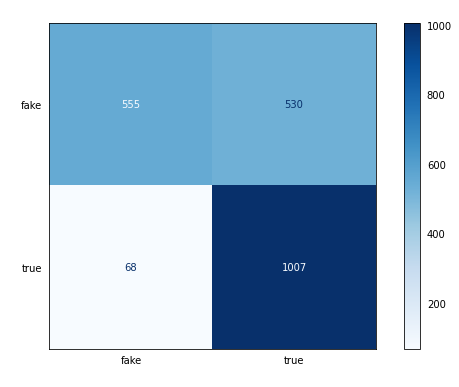

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

##### Utilizando o classificador Decision Tree

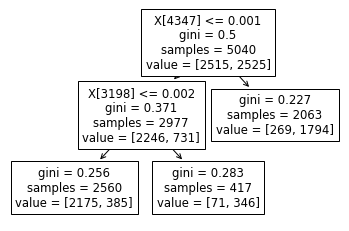

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do Decision Tree sem nenhum método de pré-processamento:: {:.2f}%'.format(accuracy))
print('F1 Score obtida do Decision Tree sem nenhum método de pré-processamento: {:.2f}%'.format(f1))

Acurácia obtida do Decision Tree sem nenhum método de pré-processamento:: 85.79%
F1 Score obtida do Decision Tree sem nenhum método de pré-processamento: 85.79%


In [ ]:
print('--------------Resultados obtidos sem nenhum método de pré-processamento---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos sem nenhum método de pré-processamento---------------

              precision    recall  f1-score   support

        fake       0.86      0.86      0.86      1085
        true       0.86      0.86      0.86      1075

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160



Matriz de Confusão obtida do Decision Tree sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


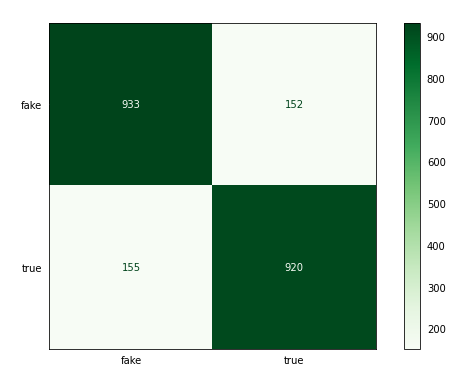

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

#### Com o método de Stemming

##### Utilizando o classificador SVM

In [ ]:
X = dados_copia['detoken']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features = 5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do SVM com o método de Stemming: {:.2f}%'.format(accuracy))
print('F1 Score obtida do SVM com o método de Stemming: {:.2f}%'.format(f1))

Acurácia obtida do SVM com o método de Stemming: 96.11%
F1 Score obtida do SVM com o método de Stemming: 96.11%


In [ ]:
print('--------------Resultados obtidos com o método de Stemming---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos com o método de Stemming---------------

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      1085
        true       0.96      0.96      0.96      1075

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



Matriz de Confusão obtida do SVM sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


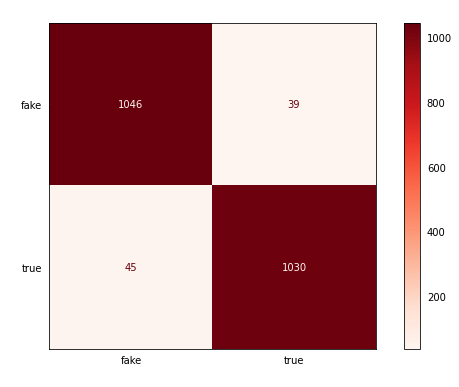

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

##### Utilizando o classificador KNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do KNN com o método de Stemming: {:.2f}%'.format(accuracy))
print('F1 Score obtida do KNN com o método de Stemming: {:.2f}%'.format(f1))

Acurácia obtida do KNN com o método de Stemming: 70.79%
F1 Score obtida do KNN com o método de Stemming: 69.28%


In [ ]:
print('--------------Resultados obtidos com o método de Stemming---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos com o método de Stemming---------------

              precision    recall  f1-score   support

        fake       0.88      0.48      0.62      1085
        true       0.64      0.93      0.76      1075

    accuracy                           0.71      2160
   macro avg       0.76      0.71      0.69      2160
weighted avg       0.76      0.71      0.69      2160



Matriz de Confusão obtida do KNN sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


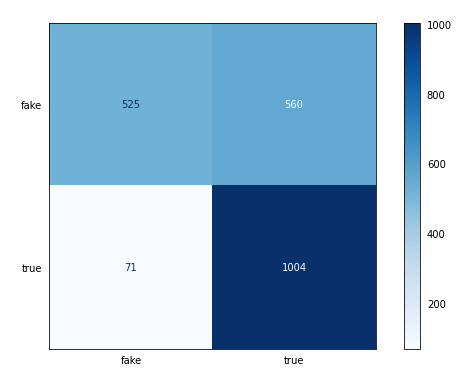

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

##### Utilizando o classificador Decision Tree

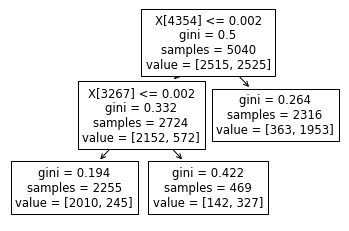

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do Decision Tree com o método de Stemming: {:.2f}%'.format(accuracy))
print('F1 Score obtida do Decision Tree com o método de Stemming: {:.2f}%'.format(f1))

Acurácia obtida do Decision Tree com o método de Stemming: 86.06%
F1 Score obtida do Decision Tree com o método de Stemming: 86.03%


In [ ]:
print('--------------Resultados obtidos com o método de Stemming---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos com o método de Stemming---------------

              precision    recall  f1-score   support

        fake       0.90      0.81      0.85      1085
        true       0.83      0.91      0.87      1075

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160



Matriz de Confusão obtida do Decision Tree sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


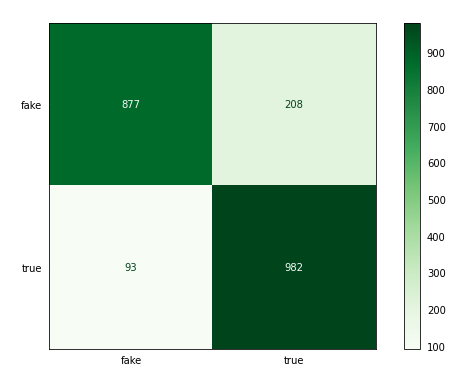

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

#### Com o método de Lemmatizing

##### Utilizando o classificador SVM

In [ ]:
X = dados_copia['detoken_lemma']
y = dados_copia['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features = 5000)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do SVM com o método de Stemming: {:.2f}%'.format(accuracy))
print('F1 Score obtida do SVM com o método de Stemming: {:.2f}%'.format(f1))

Acurácia obtida do SVM com o método de Stemming: 95.88%
F1 Score obtida do SVM com o método de Stemming: 95.88%


In [ ]:
print('--------------Resultados obtidos com o método de Stemming---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos com o método de Stemming---------------

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      1085
        true       0.96      0.96      0.96      1075

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



Matriz de Confusão obtida do SVM sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


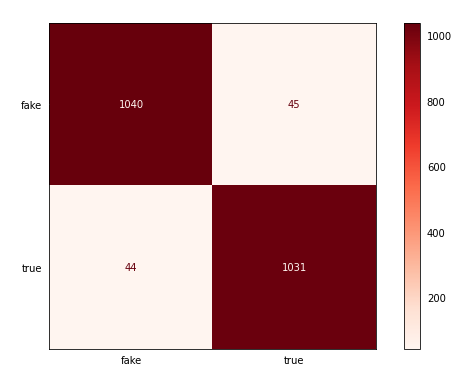

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

##### Utilizando o classificador KNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do KNN com o método de Stemming: {:.2f}%'.format(accuracy))
print('F1 Score obtida do KNN com o método de Stemming: {:.2f}%'.format(f1))

Acurácia obtida do KNN com o método de Stemming: 70.83%
F1 Score obtida do KNN com o método de Stemming: 69.29%


In [ ]:
print('--------------Resultados obtidos com o método de Stemming---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos com o método de Stemming---------------

              precision    recall  f1-score   support

        fake       0.88      0.48      0.62      1085
        true       0.64      0.94      0.76      1075

    accuracy                           0.71      2160
   macro avg       0.76      0.71      0.69      2160
weighted avg       0.76      0.71      0.69      2160



Matriz de Confusão obtida do KNN sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


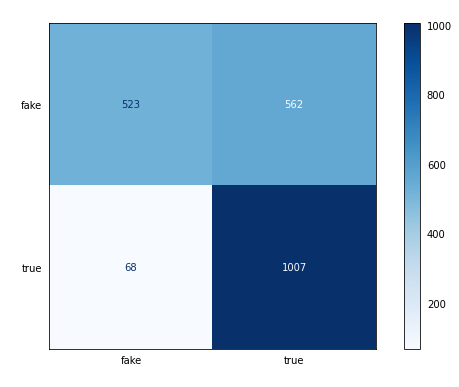

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

##### Utilizando o classificador Decision Tree

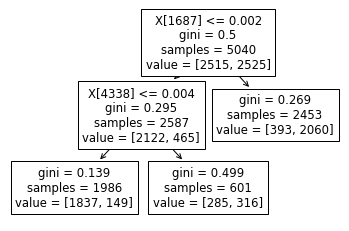

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Acurácia obtida do Decision Tree com o método de Stemming: {:.2f}%'.format(accuracy))
print('F1 Score obtida do Decision Tree com o método de Stemming: {:.2f}%'.format(f1))

Acurácia obtida do Decision Tree com o método de Stemming: 83.80%
F1 Score obtida do Decision Tree com o método de Stemming: 83.63%


In [ ]:
print('--------------Resultados obtidos com o método de Stemming---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados obtidos com o método de Stemming---------------

              precision    recall  f1-score   support

        fake       0.93      0.73      0.82      1085
        true       0.78      0.94      0.85      1075

    accuracy                           0.84      2160
   macro avg       0.85      0.84      0.84      2160
weighted avg       0.85      0.84      0.84      2160



Matriz de Confusão obtida do Decision Tree sem a utilização de nenhum método de pré-processamento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


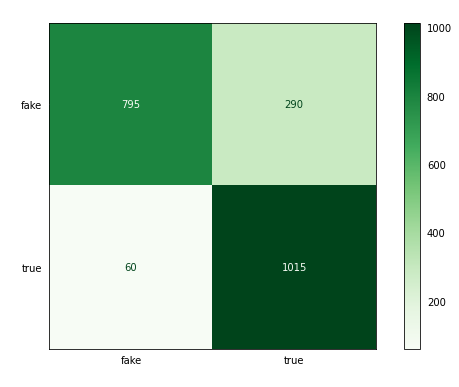

In [ ]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

#### **Conclusões Parciais**

Para os classificadores testados, notamos que o melhor entre eles é o **SVM** independente do método de pré-processamento aplicado. O Decision Tree embora não seja o melhor também obteve resultados satisfatórios. O KNN por sua vez não é tão bom, obtendo bastante dificuldade em conseguir classificar os dados "Fake". Todos os classificadores seguiram o mesmo "padrão" mesmo sendo aplicados pelos diferentes métodos de pré-processamento citados no presente trabalho.

##### Testes para rodar vários classificadores de uma única vez

In [ ]:


# names = [
#          'Nearest-Neighbors',
#          'Linear SVM',
#          'RBF SVM',
#          'Poly SVM',
#          'Decision Tree',
#          'Random Forest',
#          'Neural Net',
#          'Adaboost',
# ]

# classifiers = [
#                KNeighborsClassifier(3),
#                SVC(kernel = 'linear'),
#                SVC(gamma = 2, C = 10),
#                SVC(kernel = 'poly'),
#                DecisionTreeClassifier(max_depth=5),
#                RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
#                MLPClassifier(alpha=1, max_iter=1000),
#                AdaBoostClassifier(),
# ]

# for name, clf in zip(names, classifiers):
#   clf.fit(X_train, y_train)
#   y_predicted = clf.predict(X_test)
#   score = clf.score(X_test, y_test)
#   f1 = f1_score(y_test, y_predicted, average = 'macro')
#   precision = precision_score(y_test, y_predicted, average = 'macro')
#   recall = recall_score(y_test, y_predicted, average = 'macro')
#   print('---------------- ' + name + ' ------------------')
#   print(name + ' - Accuracy: ' + str(score))
#   print(name + ' - F1 Score: ' + str(f1))
#   print(name + ' - Precision: ' + str(precision))
#   print(name + ' - Recall: ' + str(recall))
#   print('------------------------------------------------')

##### Método de Cross-Validation (Não foi muito explorado e estudado até o momento.)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.95833333 0.96527778 0.96666667 0.95972222 0.95069444]


In [ ]:
print(scores.mean())

0.960138888888889
